In [1]:
import glob
import numpy as np
import seaborn as sns
import pandas as pd

# import matplotlib.pyplot as plt

# import FlowCytometryTools
# from FlowCytometryTools import FCMeasurement
# from FlowCytometryTools import PolyGate

# from scipy.stats import gaussian_kde


import copy
import bokeh
from bokeh.plotting import show
import matplotlib.pyplot as plt

import flowkit as fk

bokeh.io.output_notebook()
%matplotlib inline

_ = plt.ioff()

Loading BokehJS ...

In [2]:
# check version so users can verify they have the same version/API
fk.__version__

'1.0.0'

In [3]:
files = glob.glob('../../data/flow_cytometry/20230508_CD52/Sample Group - 1/*iso*')
files

['../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_PMA_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/undiff_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_DMSO_SC575_sgControl1_isotype_Data Source - 1.fcs',
 '../../data/flow_cytometry/20230508_CD52/Sample Group - 1/diff_SC575_sgControl1_isotype_IGNORE_Data Source - 1.fcs']

In [4]:
# pd.read_csv(files[2])


In [35]:
sample = fk.Sample(files[2])
df_events = sample.as_dataframe(source='raw')
df_events.columns = ['TIME', 'FSC', 'FSC-H', 'FSC-W', 'SSC', 'FITC-A', 'APC-A', 'PerCP-Cy5.5-A']
df_events = df_events[['TIME', 'FSC', 'FSC-H', 'FSC-W', 'SSC', 'FITC-A', 'APC-A']]
for col in df_events.columns[1:]:
    df_events[col+'_l'] = np.log10(df_events[col][df_events[col] > 0])

df_events = df_events[df_events['APC-A']>0]
sample_from_df = fk.Sample(df_events, sample_id='DMSO_iso')

In [39]:
p = sample_from_df.plot_histogram('FSC', source='raw')
show(p)

In [41]:

p = sample_from_df.plot_scatter('FSC', 'SSC', source='raw', subsample=True)
show(p)

In [51]:
# logicle_xform = fk.transforms.LogicleTransform('logicle', param_t=1000000, param_w=0.5, param_m=4.5, param_a=0)
log_xform = fk.transforms.LogTransform('logt', 10**5, 1)
sample_from_df.apply_transform(log_xform)

p = sample_from_df.plot_scatter('FSC', 'SSC', source='xform', subsample=True)
show(p)

In [ ]:
log_xform = fk.transforms.LogTransform('logt', 1, 1)
# log_xform = fk.transforms.logtransform('logt', 1, 1)

p = sample_from_df.plot_scatter('FSC-A_l', 'SSC-A_l', source='xform')#, subsample=True)
# p.plot.size = 1
show(p)

In [20]:
sample = fk.Sample(files[2])
p = sample.plot_histogram('FSC-A', source='raw')
show(p)

In [30]:
# log_xform = fk.transforms.LogTransform('logt', 1000000, 1)
# sample.apply_transform(log_xform)

p = sample.plot_scatter(2, 6, source='raw')#, subsample=True)
# p.plot.size = 1
show(p)

In [29]:
logicle_xform = fk.transforms.LogicleTransform('logicle', param_t=1000000, param_w=0.5, param_m=4.5, param_a=0)
sample.apply_transform(logicle_xform)

p = sample.plot_scatter(2, 6, source='xform', subsample=True)
show(p)

In [25]:
sample.get_events()

array([[ 0.00000000e+00,  1.79769656e+05,  9.59929609e+04, ...,
        -2.29730960e+00, -4.31943965e+00,             nan],
       [ 1.78285711e-03,  1.37806031e+05,  8.90400000e+04, ...,
        -2.50082806e+00, -3.37678302e+00, -3.22709696e+00],
       [ 3.79428570e-03,  1.42577766e+05,  8.43023984e+04, ...,
        -2.71322370e+00, -3.16303031e+00, -3.17936692e+00],
       ...,
       [ 9.72027435e+01,  1.52442672e+05,  7.04838438e+04, ...,
        -2.19867339e+00, -3.40044207e+00, -3.46771103e+00],
       [ 9.72039337e+01,  1.17468445e+05,  6.51414414e+04, ...,
        -2.18276785e+00, -4.01840965e+00, -3.92176697e+00],
       [ 9.72076569e+01,  1.71415969e+05,  9.64454375e+04, ...,
        -2.48614539e+00, -3.18678594e+00, -3.50335138e+00]])

In [119]:
help(fk.transforms.LogTransform.apply)

Help on function apply in module flowkit._models.transforms._transforms:

apply(self, events)
    Apply transform to given events.
    
    :param events: NumPy array of FCS event data
    :return: NumPy array of transformed events



In [110]:
sample_from_df.get_events(source = 'raw')


array([[0.00000000e+00, 1.79769656e+05, 9.59929609e+04, ...,
        4.27679682e+00, 2.70269036e+00, 6.80560350e-01],
       [1.78285711e-03, 1.37806031e+05, 8.90400000e+04, ...,
        4.08803082e+00, 2.49917197e+00, 1.62321699e+00],
       [3.79428570e-03, 1.42577766e+05, 8.43023984e+04, ...,
        4.53253365e+00, 2.28677630e+00, 1.83696973e+00],
       ...,
       [9.72027435e+01, 1.52442672e+05, 7.04838438e+04, ...,
        4.60574102e+00, 2.80132651e+00, 1.59955788e+00],
       [9.72039337e+01, 1.17468445e+05, 6.51414414e+04, ...,
        4.24605465e+00, 2.81723213e+00, 9.81590331e-01],
       [9.72076569e+01, 1.71415969e+05, 9.64454375e+04, ...,
        4.32625866e+00, 2.51385450e+00, 1.81321406e+00]])

In [123]:
log_xform = fk.transforms.LogTransform.apply('logt', 1, 1)

TypeError: apply() takes 2 positional arguments but 3 were given

In [49]:
# log_xform = fk.transforms.LogTransform('logt', 10**6, 6)
log_xform = fk.transforms.LogTransform('logt', 1, 1)
sample.apply_transform(log_xform)

# logicle_xform = fk.transforms.LogicleTransform('logicle', param_t=262144, param_w=0.5, param_m=4.5, param_a=0)
# sample.apply_transform(logicle_xform)

/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/flowutils/transforms.py:289: RuntimeWarning: divide by zero encountered in log10
  data_copy = (1. / m) * np.log10(data_copy / t) + 1.
/Users/nathanb/opt/anaconda3/lib/python3.7/site-packages/flowutils/transforms.py:289: RuntimeWarning: invalid value encountered in log10
  data_copy = (1. / m) * np.log10(data_copy / t) + 1.


In [50]:
sample.channels

,channel_number,pnn,pns,png,pne,pnr
0,1,TIME,TIME,1.0,"(0.0, 0.0)",97.0
1,2,FSC-A,FSC-A,1.0,"(0.0, 0.0)",1000000.0
2,3,FSC-H,FSC-H,1.0,"(0.0, 0.0)",1000000.0
3,4,FSC-W,FSC-W,1.0,"(0.0, 0.0)",1000.0
4,5,SSC-A,SSC-A,1.0,"(0.0, 0.0)",1000000.0
5,6,FL2-A,FITC-A,1.0,"(0.0, 0.0)",1000000.0
6,7,FL4-A,APC-A,1.0,"(0.0, 0.0)",1000000.0
7,8,FL5-A,PerCP-Cy5.5-A,1.0,"(0.0, 0.0)",1000000.0


In [31]:
asinh_xform = fk.transforms.AsinhTransform('asinh', param_t=262144, param_m=4.0, param_a=0.0)
sample.apply_transform(asinh_xform)

p = sample.plot_scatter(2, 5, source='xform', subsample=True)
show(p)

In [36]:
sample = FCMeasurement(ID='DMSO_iso', datafile=files[2])
sample['FSC-A_l'] = np.log10(sample['FSC-A'][sample['FSC-A'] > 0])
sample['FSC-A_l']


TypeError: 'FCMeasurement' object does not support item assignment

In [25]:
sample = FCMeasurement(ID='DMSO_iso', datafile=files[2])
sample = sample.data

# # gate out the noise and dead cells
# sample = sample[sample['FSC-A'] >= 1.9E5]
# sample = sample[sample['SSC-A'] >= 0.4E5]
# sample = sample[sample['SSC-A'] <= 1.2E5]
# log values
sample['FSC-A_l'] = np.log10(sample['FSC-A'][sample['FSC-A'] > 0])
sample['SSC-A_l'] = np.log10(sample['SSC-A'][sample['SSC-A'] > 0])
sample['APC-A_l'] = np.log10(sample['APC-A'][sample['APC-A'] > 0])

# sns.kdeplot(sample["BB515-A_l"], ax = ax10, color = 'grey',
#             lw = 0, alpha = 0.3, legend = False, shade = True)

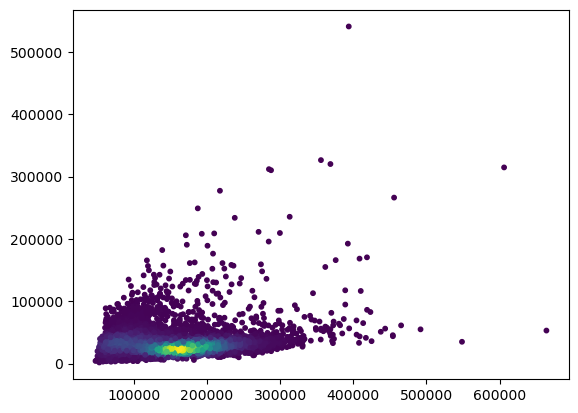

In [32]:
# Generate fake data
# x = sample['FSC-A_l'][:10000]
# y = sample['SSC-A_l'][:10000]
x = sample['FSC-A'][:10000]
y = sample['SSC-A'][:10000]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=10)
plt.show()

In [31]:
sample = FCMeasurement(ID='DMSO_iso', datafile=files[2])
sample.view_interactively()

ModuleNotFoundError: No module named 'wx'